This data set contains details regarding auctions done for various products on eBay.com. The target column, Class, provides information about the bidding behavior, 0 being normal and 1 being abnormal behavior. Abnormal behavior can be similar to malicious clicks or automatic bidding. The goal of this project is to develop a machine learning model that can predict whether the bidding behavior in a particular auction is normal (0) or not (1).

In [ ]:
# Import modules
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import svm
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Marketing-Analytics/Data/Shill_Bidding_Dataset.csv")

In [ ]:
data.head()

,Record_ID,Auction_ID,Bidder_ID,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration,Class
0,1,732,_***i,0.200000,0.400000,0.0,0.000028,0.0,0.993593,0.000028,0.666667,5,0
1,2,732,g***r,0.024390,0.200000,0.0,0.013123,0.0,0.993593,0.013123,0.944444,5,0
2,3,732,t***p,0.142857,0.200000,0.0,0.003042,0.0,0.993593,0.003042,1.000000,5,0
3,4,732,7***n,0.100000,0.200000,0.0,0.097477,0.0,0.993593,0.097477,1.000000,5,0
4,5,900,z***z,0.051282,0.222222,0.0,0.001318,0.0,0.000000,0.001242,0.500000,7,0


In [ ]:
# Drop columns which are irrelevant
data.drop(["Record_ID","Auction_ID","Bidder_ID"],axis=1, inplace=True)

In [ ]:
data.head()

,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration,Class
0,0.200000,0.400000,0.0,0.000028,0.0,0.993593,0.000028,0.666667,5,0
1,0.024390,0.200000,0.0,0.013123,0.0,0.993593,0.013123,0.944444,5,0
2,0.142857,0.200000,0.0,0.003042,0.0,0.993593,0.003042,1.000000,5,0
3,0.100000,0.200000,0.0,0.097477,0.0,0.993593,0.097477,1.000000,5,0
4,0.051282,0.222222,0.0,0.001318,0.0,0.000000,0.001242,0.500000,7,0


In [ ]:
X = data.drop("Class",axis=1)
y = data["Class"]
# Split the dataset into training and testing sets 
# use stratified splitting to account for any class imbalance
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=1, stratify=y)

In [ ]:
print("Training dataset size: {}, Testing dataset size: {}".format(X_train.shape,X_test.shape))

Training dataset size: (4424, 9), Testing dataset size: (1897, 9)


**Logistic Regression**

Logistic Regression model outputs a probability $p(X)$ between 0 and 1 for all values of $x \in X$. 


$logistic function: p(X) = \frac{e^{B_0 + B_1X}}{1 + e^{B_0 + B_1X}} $
 * sigmoid function with output range of [0,1]


odds: $ \frac{p(X)}{1-p(X)} = e^{B_0+B_1X}$
 * output range is [0, ∞]

$logit$ or log-odds: $ \log(\frac{p(X)}{1-p(X)}) = {B_0+B_1X} $
 * output range is between [-∞, ∞] and is used for regression


In [ ]:
# Fit the model using linear regression
linear = linear_model.LinearRegression()
linear.fit(X_train,y_train)

LinearRegression()

In [ ]:
linear.predict(X_test)[:10]

array([-0.00375542, -0.00248633, -0.01090699, -0.02753235,  0.01939224,
        0.99493654,  0.02761226, -0.00565047,  0.48101551,  0.00471959])

In [ ]:
y_test[:10].values

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [ ]:
print("Score on training dataset: {}, "\
      "Score on testing dataset: {}".format(linear.score(X_train,y_train), linear.score(X_test,y_test)))

Score on training dataset: 0.8166836356918418, Score on testing dataset: 0.8119909602893054


In [ ]:
logit = linear_model.LogisticRegression()
logit.fit(X_train,y_train)

LogisticRegression()

In [ ]:
logit.predict(X_test)[:10]

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [ ]:
y_test[:10].values

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [ ]:
print("Score on training dataset: {}, "\
      "Score on testing dataset: {}".format(logit.score(X_train,y_train), logit.score(X_test,y_test)))

Score on training dataset: 0.9794303797468354, Score on testing dataset: 0.9715340010542962


Logistic regression performed much better than linear regression. 

**Support Vector Machine**

Support vector algorithms maximizes a margin between classes by fitting the widest possible hyperplane between them. In the case of non-linearly separable classes, it uses kernels to move observations into higher-dimensional space and then separates them linearly with the hyperplane there.
 * hyperplane equation: $ B_0 + B_1X_1 + B_2X_2 = 0 $
 * Points which lay on the hyperplane have to follow the above equation. 
 * Observations could fall in either of the below or above regions, also called the region of classes: $ B_0 + B_1X_1 + B_2X_2 > 0 $ and $ B_0 + B_1X_1 + B_2X_2 < 0 $


Support Vector objective function is to maximize margin M: 
 * Constraint 1: subject to  $ \sum^n_{j=1}B_j^2 = 1 $
 * Constrain 2: $ y_i(B_0 + B_1X_{i1} + B_2X_{i2} + ... + B_nX_{in} \ge M(1-ϵ_i)∀i = 1 $ 
 * Constraint 2 ensures that observations will be on the correct side of the hyperplane by taking the product of coefficients with x variables and finally, with a class variable indicator.
 * Constrain 3: $ ϵ_i \ge 0, \sum^n_{i=1}ϵ_i \le C $
 * The C value is a non-negative tuning parameter to either accommodate more or fewer overall errors in the model. Having a high value of C will lead to a more robust model, whereas a lower value creates the flexible model due to less violation of error terms. 
 * Class labels: $ y_1, y_2, ... y_m \in {\{-1, 1}\} $ 

Kernel functions are the functions that, given the original feature vectors, return the same value as the dot product of its corresponding mapped feature vectors. 
 * Kernal function: $ K(x, z) \le 𝛷(X), 𝛷(Z) $
 * Polynomial kernel function: $ K(X,X') = (1+ x*x')^k $
 * Radial Basis Function (RBF): $ K(X,X') = e(-||x-x'||^2/\sigma^2) $

SVM plot examples

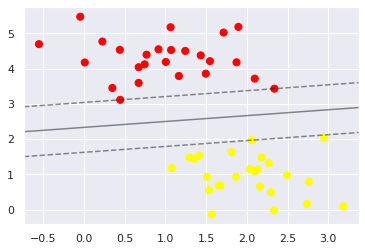

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# use seaborn plotting defaults
import seaborn as sns; sns.set()

from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)

from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)


plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model);

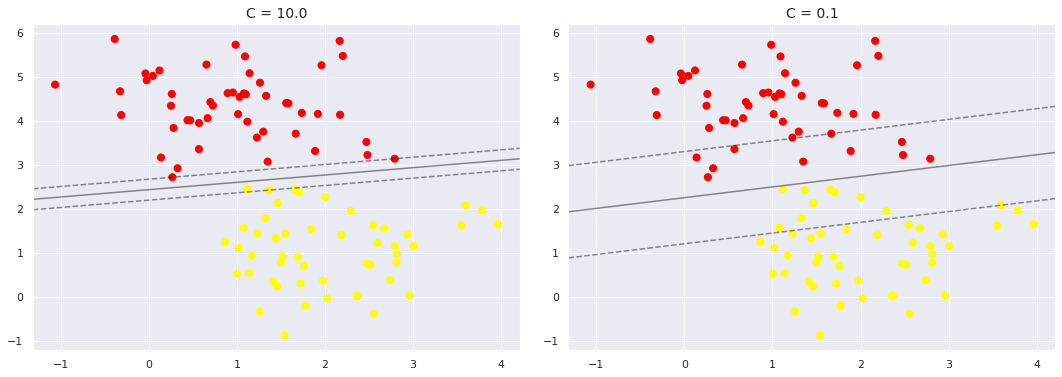

In [ ]:
# differences with c parameter; higher c-values tolerate more error
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.8)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)

SVM

In [ ]:
clf_svm=svm.SVC(kernel='linear', C=1)

In [ ]:
clf_svm

SVC(C=1, kernel='linear')

In [ ]:
clf_svm.fit(X_train,y_train)

SVC(C=1, kernel='linear')

**Decision Tree**

The Decision tree algorithm gets their name from the inverted tree-like structures they follow. In a normal tree, the bottom part is the root, and the topmost part is the leaf of the tree. Since a decision tree follows the reverse structure, the topmost node is referred to as the root node. A node is the smallest block in the decision tree. Every node has a certain rule that decides where to go next (which branch to follow). The last nodes or the terminal nodes of the decision tree are called leaves. This is where the target variable prediction happens. When a new input is provided for prediction, it first goes to the root node and then moves down to the leaf node for prediction.

Decision trees use multiple algorithms to split at the root node or sub-node. A decision tree goes through all of the features and picks the feature on which it can get the most homogeneous sub-nodes. For classification tasks, it decides the most homogeneous sub-nodes based on the information gained.

Information gain gives details on how much "information" a feature will hold about the class. Features that are perfectly separable or partitioned will give maximum information, while features that are not perfectly separable or partitioned will give us less information: $ IG(D_p,f) = I(D_p)-\frac{N_{left}}{N_p}I(D_{left}) - \frac{N_{right}}{N_p}I(D_{right})    $
 * $IG$ = information gain 
 * $I$ = impurity 
 * $f$ = feature 
 * $D_p$ = parent dataset
 * $D_{left}$ = left child dataset 
 * $D_{right}$ = right child dataset
 * $N_p$ = total number of samples in the parent dataset 
 * $N_{left}$ = number of samples in the left child dataset
 * $N_{right}$ = number of samples in the right child dataset.

Gini impurity is a measure of misclassification, which applies in a multi-class classifier context. The Gini index can be defined as the criterion that would minimize the probability of misclassification: $ I_g(t) = \sum_{i=1}^k p(i|t)(1-p(i|t)) = 1 - \sum_{i=1}^k p(i|t)^2 $
 * $k$ = number of classes
 * $p(i│t)$ = proportion of samples that belong to class k for a particular node t.

In [ ]:
import graphviz
from sklearn import tree
from six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

In [ ]:
clf_tree = tree.DecisionTreeClassifier()
clf_tree = clf_tree.fit(X_train, y_train)

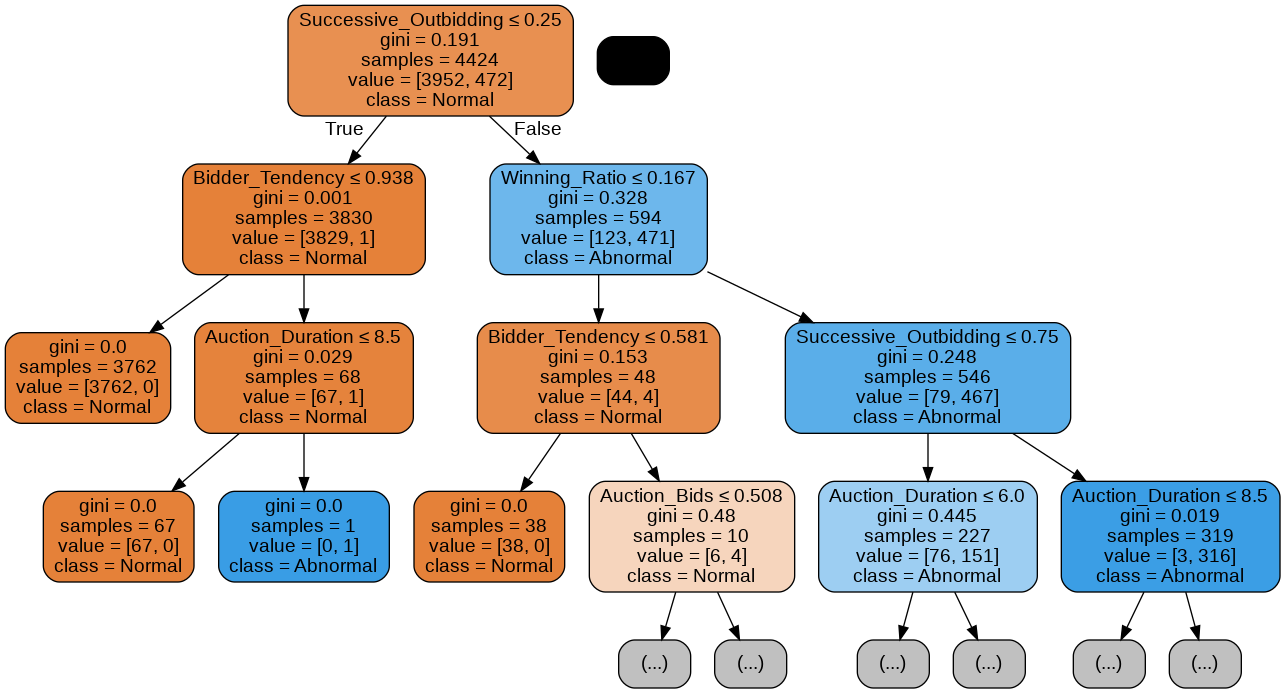

In [ ]:
dot_data = StringIO() 
export_graphviz(clf_tree, out_file=dot_data,\
                filled=True, rounded=True,\
                class_names=['Normal','Abnormal'],\
                max_depth = 3,\
                special_characters=True,\
                feature_names=X.columns.values) 
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [ ]:
clf_tree.score(X_test, y_test)

0.9973642593568793

**Random Forest**

The  random forest  algorithm reduces variance/overfitting by averaging multiple decision trees, which individually suffer from high variance.

Random Forest Algorithm:
1. A random bootstrap sample (a sample drawn with replacement) of size m is chosen from the training data. This splits the training data into subsets such as Data1, Data2, and so on. 
2. Decision trees are grown on each instance of the bootstrap. These decision trees can be referred to as Learner1, Learner2, and so on. 
3. d features are chosen randomly without replacement. 
4. Each node is split using the d features selected based on objective functions, which could be information gain. 
5. Steps 1-4 are repeated k times. Eventually, this generates Model1, Model2, and so on for each subset.
6. All of the predictions from the multiple trees are aggregated and assigned a class label by majority vote.

The thumb rule for variable selection of m variables out of total variables p, is m = sqrt(p) for classification and m = p/3 for regression problems randomly to avoid correlation among the individual trees. By doing so, significant improvement in accuracies can be achieved.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
clf = RandomForestClassifier(n_estimators=20, max_depth=None,min_samples_split=7, random_state=0).fit(X_train,y_train)

In [ ]:
clf.score(X_test, y_test)

0.9920927780706379

Test Score Comparisons

In [ ]:
logit.score(X_test,y_test)

0.9715340010542962

In [ ]:
clf_svm.score(X_test, y_test)

0.981549815498155

In [ ]:
clf_tree.score(X_test, y_test)

0.9973642593568793

In [ ]:
clf.score(X_test, y_test)

0.9920927780706379

The model that should be used in this instance is the Decision Tree. This model performed the best on this data and is easier to explain.